In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
!python --version

Python 3.10.12


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the eeg_data and participants info datasets

eeg_df = pd.read_csv("drive/My Drive/Colab Notebooks/Schizophrenia Classification Project/Data/eeg_data.csv")

In [5]:
info_df = pd.read_csv("drive/My Drive/Colab Notebooks/Schizophrenia Classification Project/Data/participants_info.csv")

In [6]:
eeg_df.head()

,Unnamed: 0,Fp1[1],Fp2[2],F3[3],F4[4],C3[5],C4[6],P3[7],P4[8],O1[9],...,T6[16],Fz[17],Pz[18],Cz[19],Pg1[20],Pg2[21],EOGR[22],EOOGL[23],EMG[24],ParticipantID
0,0,-0.714286,0.555556,-1.190476,2.301587,0.396825,0.079365,-0.555556,0.079365,0.238095,...,0.555556,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540,1
1,1,0.317460,1.507937,-0.238095,1.031746,-0.158730,0.396825,-0.555556,-1.031746,-0.396825,...,-1.666667,-3.412698,0.714286,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540,1
2,2,-1.507937,0.238095,-0.714286,1.666667,0.476190,1.507937,0.396825,1.190476,1.507937,...,0.714286,-3.412698,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540,1
3,3,-0.714286,0.873016,-0.396825,1.031746,0.079365,0.714286,0.079365,0.079365,0.555556,...,-0.714286,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540,1
4,4,-15.317460,-15.158730,-21.825397,-63.650794,-23.333333,-10.873016,-24.603175,-1.904762,-10.873016,...,2.698413,-48.650794,-0.158730,-15.396825,-18.888889,-23.015873,0.238095,-1.666667,-244.047619,1


In [7]:
# remove the unwanted Unnamed column

eeg_df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [8]:

eeg_df

,Fp1[1],Fp2[2],F3[3],F4[4],C3[5],C4[6],P3[7],P4[8],O1[9],O2[10],...,T6[16],Fz[17],Pz[18],Cz[19],Pg1[20],Pg2[21],EOGR[22],EOOGL[23],EMG[24],ParticipantID
0,-0.714286,0.555556,-1.190476,2.301587,0.396825,0.079365,-0.555556,0.079365,0.238095,0.714286,...,0.555556,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540,1
1,0.317460,1.507937,-0.238095,1.031746,-0.158730,0.396825,-0.555556,-1.031746,-0.396825,-1.031746,...,-1.666667,-3.412698,0.714286,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540,1
2,-1.507937,0.238095,-0.714286,1.666667,0.476190,1.507937,0.396825,1.190476,1.507937,1.507937,...,0.714286,-3.412698,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540,1
3,-0.714286,0.873016,-0.396825,1.031746,0.079365,0.714286,0.079365,0.079365,0.555556,0.238095,...,-0.714286,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540,1
4,-15.317460,-15.158730,-21.825397,-63.650794,-23.333333,-10.873016,-24.603175,-1.904762,-10.873016,18.730159,...,2.698413,-48.650794,-0.158730,-15.396825,-18.888889,-23.015873,0.238095,-1.666667,-244.047619,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,-5.634921,14.365079,0.634921,-5.317460,4.047619,15.158730,7.142857,13.809524,6.507937,17.936508,...,-9.047619,2.777778,13.015873,-4.285714,-1.666667,2.222222,-2.142857,-1.349206,-244.047619,7
241,14.444444,25.952381,63.968254,-0.714286,39.047619,-16.269841,35.317460,-18.015873,10.079365,-0.634921,...,-1.587302,35.000000,-0.555556,0.079365,-8.809524,-12.460317,-0.079365,-0.634921,-244.047619,7
242,-0.079365,-1.111111,22.301587,0.714286,6.031746,-0.079365,5.238095,10.158730,2.857143,4.523810,...,2.222222,5.793651,2.777778,2.619048,-1.349206,-0.952381,-0.238095,-0.714286,-244.047619,7
243,-56.666667,8.015873,-10.476190,4.603175,-37.698413,-26.984127,-37.777778,117.936508,1.269841,3.888889,...,1.507937,-33.253968,2.777778,2.460317,-52.777778,41.349206,-2.460317,-1.825397,-244.047619,7


In [9]:
info_df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [10]:
info_df

,language,firstname,Date of Birth,ParticipantID,surname,sex,lastSessionID,category,age
0,English,Danladi,11-11-1960,1,Bako,M,30,Control,44
1,English,Kehinde,11-01-1949,10,AYENI,F,3,Patient,74
2,Yoruba,Aisha,29-04-2000,11,BABALOLA,F,3,Control,22
3,English,Ayooluwatomiwa,04-02-1994,12,ALO,F,6,Control,28
4,English,Kehinde,19-11-1999,13,AYODELE,F,2,Control,23
5,English,Oyeyemi,05-10-2000,14,ADEBOYE,F,3,Patient,22
6,Yoruba,Taye,01-09-1965,15,KAYODE,F,3,Patient,57
7,Yoruba,Oluwaseun,29-07-1983,16,SIYAN,F,3,Patient,39
8,English,Edem,06-01-1983,17,OKON,M,5,Control,39
9,Yoruba,Aminat,10-05-1970,18,YUSUF,F,2,Patient,52


In [11]:
model_df = info_df.merge(eeg_df, on='ParticipantID')

In [12]:
model_df.head()

,language,firstname,Date of Birth,ParticipantID,surname,sex,lastSessionID,category,age,Fp1[1],...,T5[15],T6[16],Fz[17],Pz[18],Cz[19],Pg1[20],Pg2[21],EOGR[22],EOOGL[23],EMG[24]
0,English,Danladi,11-11-1960,1,Bako,M,30,Control,44,-0.714286,...,1.507937,0.555556,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
1,English,Danladi,11-11-1960,1,Bako,M,30,Control,44,0.317460,...,0.873016,-1.666667,-3.412698,0.714286,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
2,English,Danladi,11-11-1960,1,Bako,M,30,Control,44,-1.507937,...,1.746032,0.714286,-3.412698,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
3,English,Danladi,11-11-1960,1,Bako,M,30,Control,44,-0.714286,...,1.666667,-0.714286,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
4,English,Danladi,11-11-1960,1,Bako,M,30,Control,44,-15.317460,...,-8.809524,2.698413,-48.650794,-0.158730,-15.396825,-18.888889,-23.015873,0.238095,-1.666667,-244.047619


In [13]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   language       245 non-null    object 
 1   firstname      245 non-null    object 
 2   Date of Birth  245 non-null    object 
 3   ParticipantID  245 non-null    int64  
 4   surname        245 non-null    object 
 5   sex            245 non-null    object 
 6   lastSessionID  245 non-null    int64  
 7   category       245 non-null    object 
 8   age            245 non-null    int64  
 9   Fp1[1]         245 non-null    float64
 10  Fp2[2]         245 non-null    float64
 11  F3[3]          245 non-null    float64
 12  F4[4]          245 non-null    float64
 13  C3[5]          245 non-null    float64
 14  C4[6]          245 non-null    float64
 15  P3[7]          245 non-null    float64
 16  P4[8]          245 non-null    float64
 17  O1[9]          245 non-null    float64
 18  O2[10]    

In [14]:
# number of subjects

print('Number of Subjects:', model_df['ParticipantID'].nunique())

Number of Subjects: 27


In [15]:
model_df.drop(columns=['firstname', "Date of Birth", 'surname', 'lastSessionID'], inplace=True)

In [16]:
len(model_df.select_dtypes('object').columns)

3

In [17]:
categoricals = model_df.select_dtypes('object').columns
categoricals

Index(['language', 'sex', 'category'], dtype='object')

In [18]:
model_df

,language,ParticipantID,sex,category,age,Fp1[1],Fp2[2],F3[3],F4[4],C3[5],...,T5[15],T6[16],Fz[17],Pz[18],Cz[19],Pg1[20],Pg2[21],EOGR[22],EOOGL[23],EMG[24]
0,English,1,M,Control,44,-0.714286,0.555556,-1.190476,2.301587,0.396825,...,1.507937,0.555556,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
1,English,1,M,Control,44,0.317460,1.507937,-0.238095,1.031746,-0.158730,...,0.873016,-1.666667,-3.412698,0.714286,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
2,English,1,M,Control,44,-1.507937,0.238095,-0.714286,1.666667,0.476190,...,1.746032,0.714286,-3.412698,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
3,English,1,M,Control,44,-0.714286,0.873016,-0.396825,1.031746,0.079365,...,1.666667,-0.714286,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
4,English,1,M,Control,44,-15.317460,-15.158730,-21.825397,-63.650794,-23.333333,...,-8.809524,2.698413,-48.650794,-0.158730,-15.396825,-18.888889,-23.015873,0.238095,-1.666667,-244.047619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,English,7,F,Patient,47,-5.634921,14.365079,0.634921,-5.317460,4.047619,...,5.238095,-9.047619,2.777778,13.015873,-4.285714,-1.666667,2.222222,-2.142857,-1.349206,-244.047619
241,English,7,F,Patient,47,14.444444,25.952381,63.968254,-0.714286,39.047619,...,16.904762,-1.587302,35.000000,-0.555556,0.079365,-8.809524,-12.460317,-0.079365,-0.634921,-244.047619
242,English,7,F,Patient,47,-0.079365,-1.111111,22.301587,0.714286,6.031746,...,6.587302,2.222222,5.793651,2.777778,2.619048,-1.349206,-0.952381,-0.238095,-0.714286,-244.047619
243,English,7,F,Patient,47,-56.666667,8.015873,-10.476190,4.603175,-37.698413,...,2.936508,1.507937,-33.253968,2.777778,2.460317,-52.777778,41.349206,-2.460317,-1.825397,-244.047619


In [19]:
for x in categoricals:
    print(model_df[x].unique())

['English' 'Yoruba']
['M' 'F']
['Control' 'Patient']


In [20]:
for categorical in categoricals:
    uniques = model_df[categorical].unique()
    model_df[categorical] = model_df[categorical].apply(lambda x: 1 if x == uniques[0] else 0)

# control = English = Male = 1


In [21]:
model_df

,language,ParticipantID,sex,category,age,Fp1[1],Fp2[2],F3[3],F4[4],C3[5],...,T5[15],T6[16],Fz[17],Pz[18],Cz[19],Pg1[20],Pg2[21],EOGR[22],EOOGL[23],EMG[24]
0,1,1,1,1,44,-0.714286,0.555556,-1.190476,2.301587,0.396825,...,1.507937,0.555556,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
1,1,1,1,1,44,0.317460,1.507937,-0.238095,1.031746,-0.158730,...,0.873016,-1.666667,-3.412698,0.714286,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
2,1,1,1,1,44,-1.507937,0.238095,-0.714286,1.666667,0.476190,...,1.746032,0.714286,-3.412698,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
3,1,1,1,1,44,-0.714286,0.873016,-0.396825,1.031746,0.079365,...,1.666667,-0.714286,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
4,1,1,1,1,44,-15.317460,-15.158730,-21.825397,-63.650794,-23.333333,...,-8.809524,2.698413,-48.650794,-0.158730,-15.396825,-18.888889,-23.015873,0.238095,-1.666667,-244.047619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,1,7,0,0,47,-5.634921,14.365079,0.634921,-5.317460,4.047619,...,5.238095,-9.047619,2.777778,13.015873,-4.285714,-1.666667,2.222222,-2.142857,-1.349206,-244.047619
241,1,7,0,0,47,14.444444,25.952381,63.968254,-0.714286,39.047619,...,16.904762,-1.587302,35.000000,-0.555556,0.079365,-8.809524,-12.460317,-0.079365,-0.634921,-244.047619
242,1,7,0,0,47,-0.079365,-1.111111,22.301587,0.714286,6.031746,...,6.587302,2.222222,5.793651,2.777778,2.619048,-1.349206,-0.952381,-0.238095,-0.714286,-244.047619
243,1,7,0,0,47,-56.666667,8.015873,-10.476190,4.603175,-37.698413,...,2.936508,1.507937,-33.253968,2.777778,2.460317,-52.777778,41.349206,-2.460317,-1.825397,-244.047619


In [22]:
# drop the participant ID since the model is not meant for specific patients
model_df = model_df.drop(columns=['ParticipantID'], axis=1)

In [23]:
model_df['sex'].unique()

array([1, 0])

In [24]:
print(model_df.select_dtypes('object').columns)

# no more non-numeric columns!

Index([], dtype='object')


In [25]:
model_df.head()

,language,sex,category,age,Fp1[1],Fp2[2],F3[3],F4[4],C3[5],C4[6],...,T5[15],T6[16],Fz[17],Pz[18],Cz[19],Pg1[20],Pg2[21],EOGR[22],EOOGL[23],EMG[24]
0,1,1,1,44,-0.714286,0.555556,-1.190476,2.301587,0.396825,0.079365,...,1.507937,0.555556,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
1,1,1,1,44,0.317460,1.507937,-0.238095,1.031746,-0.158730,0.396825,...,0.873016,-1.666667,-3.412698,0.714286,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
2,1,1,1,44,-1.507937,0.238095,-0.714286,1.666667,0.476190,1.507937,...,1.746032,0.714286,-3.412698,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
3,1,1,1,44,-0.714286,0.873016,-0.396825,1.031746,0.079365,0.714286,...,1.666667,-0.714286,-3.095238,0.873016,-325.000000,-325.000000,-325.000000,-325.000000,-325.000000,-164.682540
4,1,1,1,44,-15.317460,-15.158730,-21.825397,-63.650794,-23.333333,-10.873016,...,-8.809524,2.698413,-48.650794,-0.158730,-15.396825,-18.888889,-23.015873,0.238095,-1.666667,-244.047619


In [29]:
cols = model_df.columns.tolist()
cols

['language',
 'sex',
 'category',
 'age',
 'Fp1[1]',
 'Fp2[2]',
 'F3[3]',
 'F4[4]',
 'C3[5]',
 'C4[6]',
 'P3[7]',
 'P4[8]',
 'O1[9]',
 'O2[10]',
 'F7[11]',
 'F8[12]',
 'T3[13]',
 'T4[14]',
 'T5[15]',
 'T6[16]',
 'Fz[17]',
 'Pz[18]',
 'Cz[19]',
 'Pg1[20]',
 'Pg2[21]',
 'EOGR[22]',
 'EOOGL[23]',
 'EMG[24]']

In [28]:
len(cols)

28

In [30]:
model_df.to_csv("drive/My Drive/Colab Notebooks/Schizophrenia Classification Project/Data/model_data_exp.csv", index=False)

## EDA

In [31]:
features = model_df.drop('category', axis=1).copy()

In [32]:
num_features = len(features.columns)
print('Features: ', num_features)

Features:  27


In [33]:
cat_features = features[['language', 'sex', 'age']]

In [34]:
'Categorical Features: ', len(cat_features.columns)

('Categorical Features: ', 3)

In [36]:
cont_features = features.drop(columns=['language', 'sex', 'age'], axis=1)

In [37]:
'Continuous Features: ', len(cont_features.columns)

('Continuous Features: ', 24)

In [38]:
model_df.dtypes

language       int64
sex            int64
category       int64
age            int64
Fp1[1]       float64
Fp2[2]       float64
F3[3]        float64
F4[4]        float64
C3[5]        float64
C4[6]        float64
P3[7]        float64
P4[8]        float64
O1[9]        float64
O2[10]       float64
F7[11]       float64
F8[12]       float64
T3[13]       float64
T4[14]       float64
T5[15]       float64
T6[16]       float64
Fz[17]       float64
Pz[18]       float64
Cz[19]       float64
Pg1[20]      float64
Pg2[21]      float64
EOGR[22]     float64
EOOGL[23]    float64
EMG[24]      float64
dtype: object

## Univariate Analysis

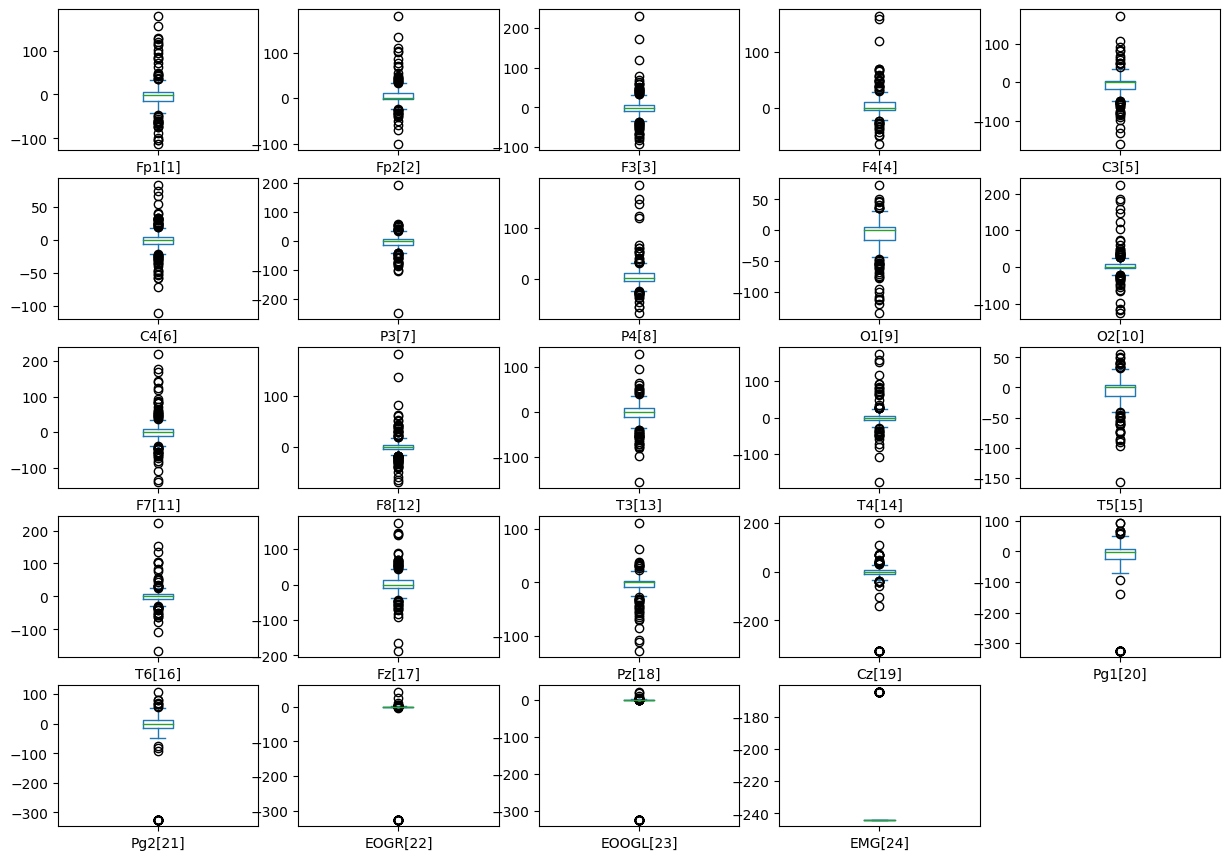

In [ ]:
features[cont_features.columns].plot(kind='box', figsize=(15, 15), subplots=True, layout=(7, 5))
plt.show()

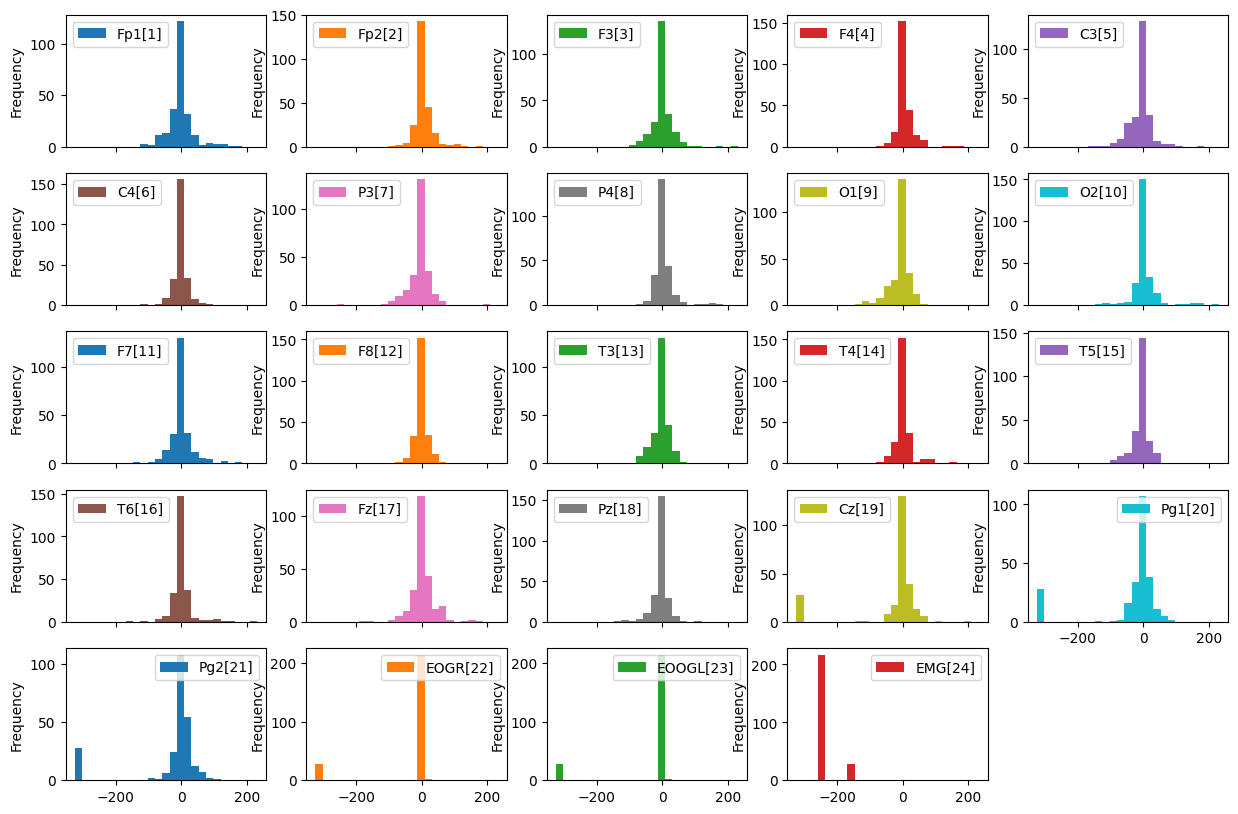

In [ ]:
features[cont_features.columns].plot(kind='hist', bins=25, figsize=(15, 12), subplots=True, layout=(6, 5))
plt.show()

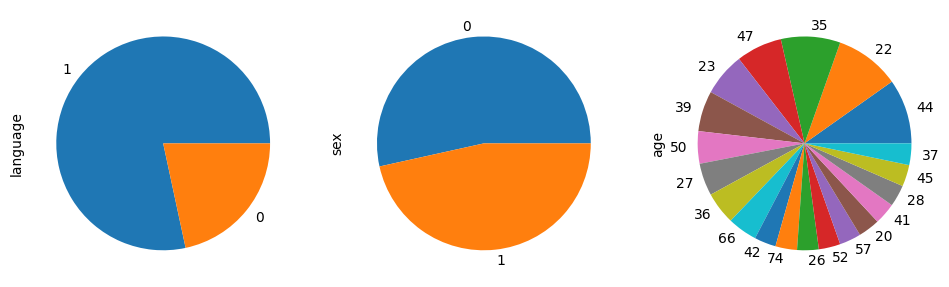

In [ ]:
plt.figure(figsize=(20, 5))
for index, feature in enumerate(cat_features):
    plt.subplot(1, 5, index + 1)
    features[feature].value_counts().plot(kind='pie')
plt.show()

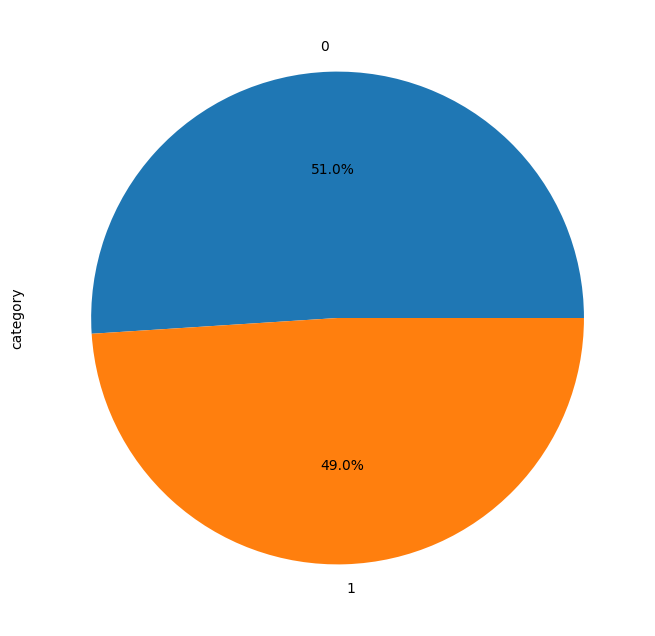

In [ ]:
plt.figure(figsize=(8, 8))
model_df['category'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.show()

In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(features[cont_features.columns])
plt.show()

Output hidden; open in https://colab.research.google.com to view.